# Segmenting and Counting Objects in the Blue Channel
In this notebook, we'll process a fluorescent microscopy image to segment and count the objects in its blue channel.

## Step 1: Load the required libraries
We'll use libraries such as `matplotlib` for plotting, and `skimage` for image processing.

In [1]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology
from skimage.filters import threshold_otsu

## Step 2: Load the image
Let's load the RGB image using the `skimage.io.imread()` function.

In [2]:
image_url = 'https://github.com/haesleinhuepf/git-bob-bioimage-analysis-example/blob/main/data/hela-cells-8bit.png?raw=true'
image = io.imread(image_url)

# Display the image
image

array([[[ 3,  6,  1],
        [ 3,  7,  0],
        [ 3,  6,  1],
        ...,
        [11,  8,  2],
        [11,  7,  2],
        [11, 11,  2]],

       [[ 3,  6,  1],
        [ 3,  8,  1],
        [ 3,  7,  1],
        ...,
        [11, 10,  2],
        [10, 10,  2],
        [11, 11,  2]],

       [[ 4,  6,  1],
        [ 3,  6,  1],
        [ 4,  6,  1],
        ...,
        [10, 10,  2],
        [11, 10,  2],
        [11, 10,  2]],

       ...,

       [[15, 14,  8],
        [14, 14,  8],
        [15, 14,  7],
        ...,
        [10, 11,  5],
        [10, 12,  4],
        [11, 14,  5]],

       [[14, 16,  7],
        [16, 15,  7],
        [15, 16,  8],
        ...,
        [10, 11,  4],
        [11, 13,  4],
        [11, 16,  5]],

       [[15, 18,  7],
        [14, 17,  8],
        [14, 17,  8],
        ...,
        [ 9, 12,  5],
        [10, 13,  5],
        [11, 15,  5]]], dtype=uint8)

## Step 3: Extract the blue channel
The objects we are interested in are prominent in the blue channel. Let's isolate it.

In [3]:
blue_channel = image[:, :, 2]

# Show the shape of the blue channel
blue_channel.shape

(512, 672)

## Step 4: Visualize the blue channel
Let's plot the blue channel to inspect its contents.

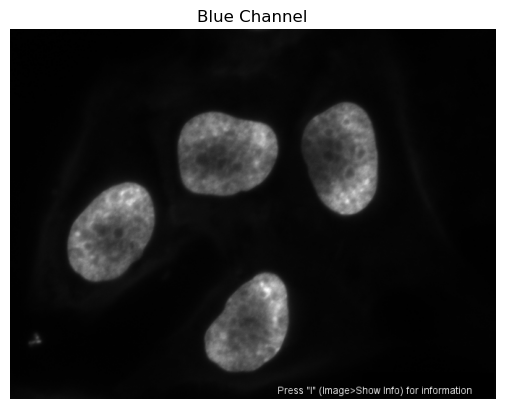

In [4]:
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')
plt.show()

## Step 5: Apply a threshold
We will use Otsu's method to find a threshold that separates the objects from the background.

In [5]:
threshold_value = threshold_otsu(blue_channel)
threshold_value

55

## Step 6: Create a binary image
Use the threshold to convert the blue channel into a binary image.

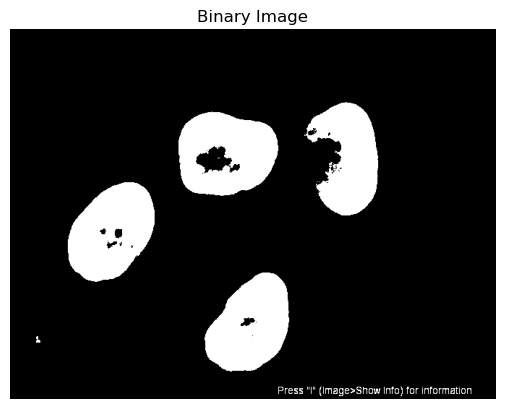

In [6]:
binary_image = blue_channel > threshold_value

plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

## Step 7: Clean the image
We will remove small objects and fill holes for better segmentation results.

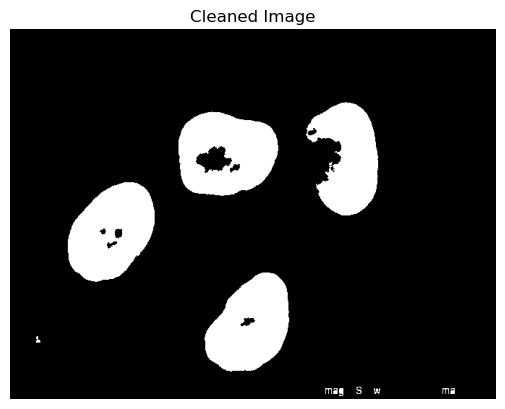

In [7]:
cleaned_image = morphology.remove_small_objects(binary_image, min_size=30)
cleaned_image = morphology.remove_small_holes(cleaned_image, area_threshold=30)

plt.imshow(cleaned_image, cmap='gray')
plt.title('Cleaned Image')
plt.axis('off')
plt.show()

## Step 8: Label and count objects
Finally, we'll label these components and count how many are there.

In [8]:
label_image = measure.label(cleaned_image)
num_objects = label_image.max()
num_objects

12

## Step 9: Visualize the segmented objects
Let's display the segmented objects with color labels.

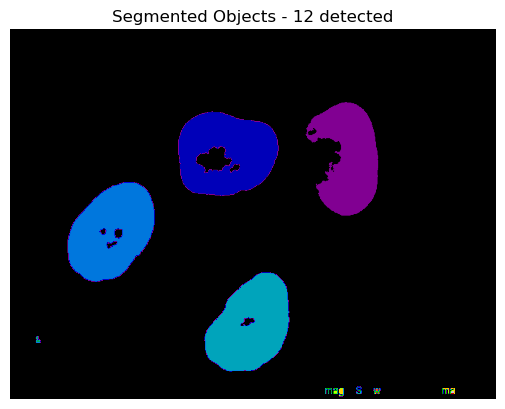

In [9]:
plt.imshow(label_image, cmap='nipy_spectral')
plt.title(f'Segmented Objects - {num_objects} detected')
plt.axis('off')
plt.show()